<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Location, dispersion
- Robust statistics, $M$-estimation

<hr/>

<h1><font color="darkblue">Robust Statistics</font></h1>

### Datasets

- For example, a set of $n$ scalar measurements 

> $\displaystyle D = \big\{x_i: \ i=1\dots{}n\big\} $

### How to characterize the data?
- Location
- Dispersion
- Shape?

### Maximum Likelihood Estimation

- MLE looks for the optimal parameter of the likelihood function

> Worked well before. Using Gaussian likelihood, the MLE for the location was the (weighted) average of measurements. We also used the sample variance for dispersion.

- Problems with outliers when using, e.g., Gaussian likelihood

> Just a few outliers can throw around these estimates big time!


### Location

- MLE looks for the parameter to optimize the likelihood function

>$\displaystyle L(\mu) = p(D \lvert \mu) = \prod_{i=1}^n \ell_{\!i}(\mu)$
>
> with $\quad\ell_{\!i}(\mu) = f_0(x_i-\mu)$
> 
>$\displaystyle \hat{\mu} = \arg \max_{\mu} \prod_i\,f_0(x_i-\mu)$

- Very general but for a special family of functions

### How to solve it?

- Solve it as before: take its log and differentiate

>$\displaystyle \hat{\mu} = \arg \min_{\mu} \sum_{i=1}^n \rho(x_i-\mu)$
>
> where $\quad\rho = -\log f_0$

- At the minimum the derivative vanishes

>$\displaystyle \sum_{i=1}^n \rho'(x_i-\hat{\mu})=0$

- And that's it! Almost...

### What $\rho$?

- For Gaussian likelihood

>$\displaystyle \rho(t) = \frac{t^2}{2}$
>
> and we have
>
>$\displaystyle \sum_{i=1}^n (x_i-\hat{\mu})=0$

- So $\hat{\mu}$ is the **mean** (as before)

> What if $\rho(t)=t^2$ instead?

### Robust $\rho$-function

- Less sensitive to outliers, e.g.,

>$\rho(t) = \lvert\,t\,\rvert$
>
> and we have
>
>$\displaystyle \sum_{i=1}^n \textrm{sgn}(x_i-\hat{\mu})=0$

- So $\hat{\mu}$ is the **median** 


### Different $\rho$-functions

- Many possible functions to choose from, e.g., 


<img src='https://upload.wikimedia.org/wikipedia/commons/c/c1/RhoFunctions.png' width=400 align=left /> 
<!-- <img src="files/RhoFunctions.png" width=400 align=left /> --> 

### The trick

- Define a new function $W$ 

>$\displaystyle W(t) = \frac{\rho'(t)}{t}$
>
> so we have
>
>$\displaystyle \sum_{i=1}^n W(x_i\!-\!\hat{\mu})\,(x_i\!-\!\hat{\mu})=0$

- If we had constant $w_i$ weights

>$\displaystyle \sum_{i=1}^n w_i\,(x_i\!-\!\hat{\mu})=0$
>
> the solution would be the weighted average
>
>$\displaystyle \hat{\mu} = \frac{\sum w_ix_i}{\sum w_i}$


### Iterative method

- Intuitive and efficient

>1. Obtain initial estimate of $\hat{\mu}$, e.g., median
>2. Assign $w_i=W(x_i\!-\!\hat{\mu})$ weights to the measurements
>3. Calculate the weighted average
>4. Repeat steps 2 and 3 until convergence

- Very fast convergence in practice

<img src='files/robust.png' width=450 align=left>
<!-- href="https://egret.psychol.cam.ac.uk/statistics/local_copies_of_sources_Cardinal_and_Aitken_ANOVA/A_Brief_Overview_of_Robust_Statistics.htm" -->

Populating the interactive namespace from numpy and matplotlib


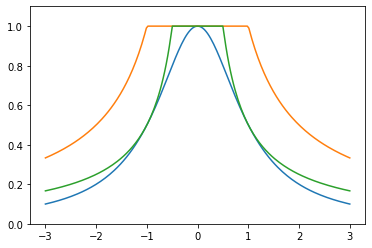

In [1]:
def Wc(t,c=1): # Cauchy
    return 1 / (1 + np.square(t/c))

def Wh(t,k=1): # Huber
    w = np.ones_like(t)
    abst = np.abs(t)
    i = (abst > k)
    w[i] = k / abst[i]
    return w

%pylab inline
t = np.linspace(-3,3,200); ylim(0, 1.1);
[plot(t,w) for w in [Wc(t), Wh(t), Wh(t,0.5)]];

In [2]:
np.random.seed(42)
x = np.random.randn(100,1)
x[0] = 200 # outlier
x.mean(), x[1:].mean()

(1.8911863410757943, -0.10991278679212746)

[[2.54789391e-05 1.95363252e-01 3.92728740e-01]]
[[2.51313636e-05 6.93908140e-01 9.85384110e-01]]
[[2.50406264e-05 9.15873333e-01 8.10917106e-01]]
[[2.50028007e-05 9.77427536e-01 7.13297811e-01]]
[[2.49867618e-05 9.92351907e-01 6.72299766e-01]]
[[2.49799665e-05 9.96343371e-01 6.55237403e-01]]
[[2.49770931e-05 9.97597656e-01 6.48091352e-01]]
[[2.49758796e-05 9.98049158e-01 6.45086280e-01]]
[[2.49753673e-05 9.98225747e-01 6.43820136e-01]]
[[2.49751511e-05 9.98297776e-01 6.43286210e-01]]


-0.09697112354665934

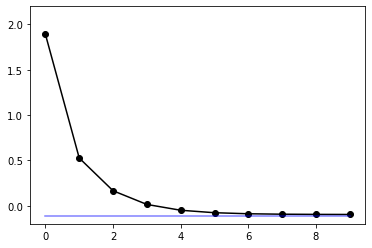

In [3]:
# iterate for a robust location
mu, w = [], np.ones_like(x)

for _ in range(10):
    m = sum(w*x) / sum(w)
    mu.append(m) # save for plotting
    w = Wc(x-m)
    print (w[:3].T)

plot(mu,'ko-'); 
plot(x[1:].mean()*ones_like(mu), 'b-', alpha=0.5); 
ylim(-0.2,2.2)
m

### Dispersion

- MLE looks for the parameter for the optimial likelihood function

>$\displaystyle L(\sigma) = p(D \lvert \sigma) = \prod_{i=1}^n \ell_{\!i}(\sigma)$
>
> with $\displaystyle\quad\ell_{\!i}(\sigma) = \frac{1}{\sigma}\ f_0\!\left(\frac{x_i}{\sigma}\right)$
>
>$\displaystyle \hat{\sigma} = \arg \max_{\sigma} \frac{1}{\sigma^n}\prod_i\ f_0\!\left(\frac{x_i}{\sigma}\right)$

- Very general but for "scale" family of functions

### Influence and $\rho$ functions

- Influence function

>$\displaystyle \psi = -f_0'\big/f_0$

- The $\rho$-function

>$\displaystyle \rho(t) = t\, \psi(t)$



### Optimum

- Derivative vanishes at optimal $\hat{\sigma}$

>$\displaystyle \frac{1}{n} \sum_{i=1}^n \rho\left(\frac{x_i}{\hat{\sigma}}\right) = 1$

- Often $\rho$ is normalized s.t. it tends to 1 as the argument goes to $\infty$

> Scaling is accommodated by new parameter $\delta$
>
>$\displaystyle \frac{1}{n} \sum_{i=1}^n \rho\left(\frac{x_i}{\hat{\sigma}}\right) = \delta$
>
> For example, $\delta=1/2\ $ is often used 

### What $\rho$?

- For Gaussian likelihood


>$\displaystyle f_0(t) = \beta\, e^{-t^2/2} \quad$ 
and
>
>$\displaystyle f_0'(t) = -t \ \beta\, e^{-t^2/2}$ 
>
> hence
>
>$\psi(t) = t\quad$ and $\quad\rho(t)=t^2$ 
>
> and we have
>
>$\displaystyle \frac{1}{n} \sum_{i=1}^n \left(\frac{x_i}{\hat{\sigma}}\right)^2 = 1$

- So $\hat{\sigma}$ is the **RMS** (as before)

>$\displaystyle \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n x_i^2 $


### The Weight

- Define a new function $W$ 

>$ W(t) = \left\{ \begin{array}{ll}
         \rho(t) \big/ t^2 & \mbox{if $t\neq{}0$}\\
         \rho''(0) & \mbox{if $t=0$}\end{array} \right.  $
> 
> so we have
>
>$\displaystyle \hat{\sigma}^2 = \frac{1}{n\delta} \sum_{i=1}^n W\!\left(\frac{x_i}{\hat{\sigma}}\right)\,x_i^2$
>
> where $\delta$ is the parameter we introduced earlier

- Play the same iterative trick

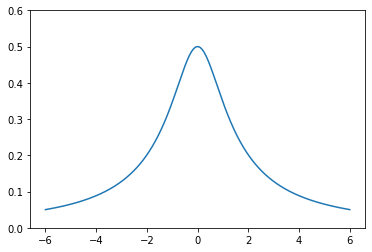

In [4]:
def rho(t,c=1.0):
    return c*c * 0.5 * np.log(1 + np.square(t/c))

def W(t,c=1.0):
    return rho(t,c) / np.square(t)

t = np.linspace(-6,6,300); 
plot(t,W(t)); ylim(0,0.6);

In [5]:
naive, cheat = np.sqrt(np.square(x).mean()), np.sqrt(np.square(x[1:]).mean())
naive, cheat

(20.02061035643945, 0.9127818753073593)

(20.02061035643945, 0.9578626069648577)

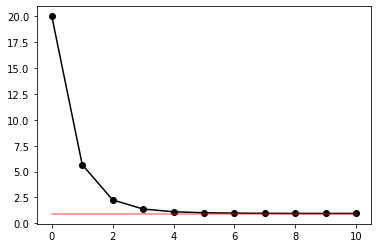

In [6]:
scale, delta = [np.sqrt(np.square(x).mean())], 0.3
for _ in range(10):
    w = W(x/scale[-1])
    scale.append(np.sqrt((np.square(x)*w).mean()/delta))
plot(scale,'ko-'); 
plot(cheat*np.ones_like(scale), 'r-', alpha=0.5); 
scale[0], scale[-1]

<!-- img src="http://t1.gstatic.com/images?q=tbn:ANd9GcTR6qV3A4eiZFuuDWwHRPZUqhWdmx5-PRlSAuaxbckx6DOMkWTT" width=200 align=right -->

<img src="files/maronna.jpg" width=200 align=right />


### New opportunities


- Robust regression

> Minimize robust $M$-scale of residuals instead of RMS

- Robust PCA

> Maximize robust $M$-scale (squared) instead of variance (Maronna 2005)